# Multi Linear Regression 
Multiple linear regression is an extension of simple linear regression, where you have more than one independent variable (predictor) to predict a dependent variable (target). The basic idea is to fit a linear equation to the data, but instead of a single slope and intercept, you have multiple coefficients for each independent variable.

### Model Representation
$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + ... + \theta_n x_n
$$

From this we get to know it is a linear equation with multiple variables. Here, $y$ is the dependent variable and $x_1, x_2, x_3, ..., x_n$ are the independent variables. $\theta_0$ is the intercept and $\theta_1, \theta_2, \theta_3, ..., \theta_n$ are the coefficients.

In [3]:
# importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Creating dataframe from csv file
df = pd.read_csv('heart_data.csv')
df.head(10)



,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
5,6,54.403626,29.333176,9.550046
6,7,49.056162,9.060846,7.624507
7,8,4.784604,12.835021,15.854654
8,9,65.730788,11.991297,3.067462
9,10,35.257449,23.277683,12.098484


In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0     biking    smoking  heart.disease
0             1  30.801246  10.896608      11.769423
1             2  65.129215   2.219563       2.854081
2             3   1.959665  17.588331      17.177803
3             4  44.800196   2.802559       6.816647
4             5  69.428454  15.974505       4.062224
..          ...        ...        ...            ...
493         494  47.660440  27.562464      11.294392
494         495  45.097203  21.385620       9.616762
495         496   8.279743   6.423720      13.495168
496         497  42.345863  20.741328      10.115865
497         498  30.774254  23.610175      11.843556

[498 rows x 4 columns]>

In [5]:
df.describe()

,Unnamed: 0,biking,smoking,heart.disease
count,498.000000,498.000000,498.000000,498.000000
mean,249.500000,37.788411,15.435034,10.174538
std,143.904482,21.481519,8.289959,4.571874
min,1.000000,1.119154,0.525850,0.551898
25%,125.250000,20.204598,8.279776,6.513683
50%,249.500000,35.824459,15.814614,10.385255
75%,373.750000,57.852786,22.568925,13.724024
max,498.000000,74.907111,29.946743,20.453496


In [6]:
df.corr

<bound method DataFrame.corr of      Unnamed: 0     biking    smoking  heart.disease
0             1  30.801246  10.896608      11.769423
1             2  65.129215   2.219563       2.854081
2             3   1.959665  17.588331      17.177803
3             4  44.800196   2.802559       6.816647
4             5  69.428454  15.974505       4.062224
..          ...        ...        ...            ...
493         494  47.660440  27.562464      11.294392
494         495  45.097203  21.385620       9.616762
495         496   8.279743   6.423720      13.495168
496         497  42.345863  20.741328      10.115865
497         498  30.774254  23.610175      11.843556

[498 rows x 4 columns]>

<Axes: >

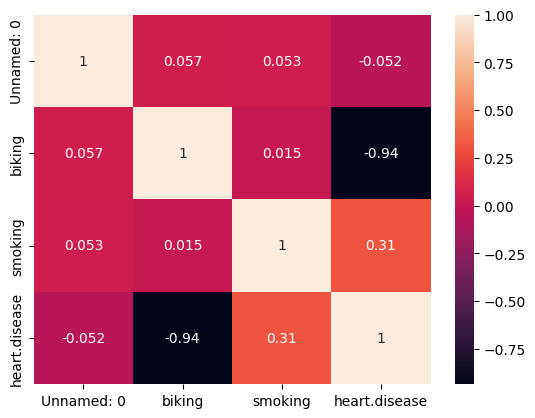

In [7]:
sns.heatmap(df.corr(), annot=True)

# To Find the coefficients in the equation, we use the Ordinary Least Squares method.
Certainly! In multiple linear regression, the Ordinary Least Squares (OLS) method is used to find the slope (coefficients) for each independent variable. OLS aims to minimize the sum of squared differences between the actual values (target) and the predicted values of the dependent variable. Here's how you can use OLS to find the slopes in multiple linear regression:

**Step 1: Set up the Multiple Linear Regression Model**

In multiple linear regression, you have a model like this:

\[Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon\]

Where:
- \(Y\) is the dependent variable.
- \(\beta_0\) is the intercept (constant).
- \(\beta_1, \beta_2, \ldots, \beta_n\) are the coefficients for the independent variables \(X_1, X_2, \ldots, X_n\).
- \(X_1, X_2, \ldots, X_n\) are the independent variables.
- \(\epsilon\) is the error term.

**Step 2: Calculate the Slopes (\(\beta_1, \beta_2, \ldots, \beta_n\))**

The goal is to find the values of \(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\) that minimize the sum of squared differences between the observed values of \(Y\) and the predicted values. Mathematically, this can be represented as:

\[S = \sum_{i=1}^{N} (Y_i - \hat{Y_i})^2\]

Where:
- \(S\) is the sum of squared differences.
- \(N\) is the number of data points.
- \(Y_i\) is the actual value of the dependent variable for the \(i\)-th data point.
- \(\hat{Y_i}\) is the predicted value of the dependent variable for the \(i\)-th data point.

To minimize \(S\), we take the partial derivative of \(S\) with respect to each coefficient (\(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\)), set them equal to zero, and solve for the coefficients.

The formula for calculating the coefficients \(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\) is as follows:

\[\boldsymbol{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}\]

Where:
- \(\boldsymbol{\beta}\) is a vector containing the coefficients \(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\).
- \(\mathbf{X}\) is the design matrix containing the independent variables.
- \(\mathbf{Y}\) is the vector of dependent variable values.

This equation provides the values of \(\beta_0, \beta_1, \beta_2, \ldots, \beta_n\) that minimize the sum of squared differences, thus giving you the slopes for each independent variable.

Once you calculate \(\boldsymbol{\beta}\), each coefficient \(\beta_i\) corresponds to the slope for the independent variable \(X_i\) in the multiple linear regression model.

In [19]:
from sklearn.linear_model import LinearRegression

# Creating linear regression model
model = LinearRegression()
model.fit(df[['biking']], df[['heart.disease']])
m  = model.coef_[0][0]
c = model.intercept_[0]
print("slope = ", m)
print("intercept = ", c)

slope =  -0.19909136369323066
intercept =  17.697884340304185


In [20]:
df.head(10)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
5,6,54.403626,29.333176,9.550046
6,7,49.056162,9.060846,7.624507
7,8,4.784604,12.835021,15.854654
8,9,65.730788,11.991297,3.067462
9,10,35.257449,23.277683,12.098484


In [22]:
x = float(input("Enter the biking time: "))
y = m*x + c
print("Heart disease risk is: ", y)

Heart disease risk is:  3.8752787543314504
